In [1]:



!pip install pandas scikit-learn joblib matplotlib
!pip install streamlit pyngrok



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 65.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib


FILE_NAME = "Credit Risk Benchmark Dataset.csv"
TARGET_COL = 'dlq_2yrs'

try:
    df = pd.read_csv(FILE_NAME)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"ERROR: File '{FILE_NAME}' not found. Please upload it to Colab.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred during file loading: {e}")
    df = None

if df is not None:
    print(f"Total records: {len(df)}")
    print("First 5 rows of the dataset:")
    print(df.head())

Data loaded successfully.
Total records: 16714
First 5 rows of the dataset:
   rev_util   age  late_30_59  debt_ratio  monthly_inc  open_credit  late_90  \
0  0.006999  38.0         0.0    0.302150       5440.0          4.0      0.0   
1  0.704592  63.0         0.0    0.471441       8000.0          9.0      0.0   
2  0.063113  57.0         0.0    0.068586       5000.0         17.0      0.0   
3  0.368397  68.0         0.0    0.296273       6250.0         16.0      0.0   
4  1.000000  34.0         1.0    0.000000       3500.0          0.0      0.0   

   real_estate  late_60_89  dependents  dlq_2yrs  
0          1.0         0.0         3.0         0  
1          1.0         0.0         0.0         0  
2          0.0         0.0         0.0         0  
3          2.0         0.0         0.0         0  
4          0.0         0.0         1.0         0  


In [3]:
if df is not None:
    print("--- Initial Data Snapshot ---")
    print(f"Total records: {len(df)}")
    print("First 5 rows:")
    print(df.head())
    print("\nColumn Information:")
    df.info()

--- Initial Data Snapshot ---
Total records: 16714
First 5 rows:
   rev_util   age  late_30_59  debt_ratio  monthly_inc  open_credit  late_90  \
0  0.006999  38.0         0.0    0.302150       5440.0          4.0      0.0   
1  0.704592  63.0         0.0    0.471441       8000.0          9.0      0.0   
2  0.063113  57.0         0.0    0.068586       5000.0         17.0      0.0   
3  0.368397  68.0         0.0    0.296273       6250.0         16.0      0.0   
4  1.000000  34.0         1.0    0.000000       3500.0          0.0      0.0   

   real_estate  late_60_89  dependents  dlq_2yrs  
0          1.0         0.0         3.0         0  
1          1.0         0.0         0.0         0  
2          0.0         0.0         0.0         0  
3          2.0         0.0         0.0         0  
4          0.0         0.0         1.0         0  

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16714 entries, 0 to 16713
Data columns (total 11 columns):
 #   Column       

In [4]:
if df is not None:
    # Separate Features (X) and Target (y)
    X = df.drop(columns=[TARGET_COL])
    y = df[TARGET_COL]

    print("Features (X) and Target (y) successfully separated")
    print(f"X shape: {X.shape}, y shape: {y.shape}")
else:
    print("Error: DataFrame 'df' not found. Please ensure Cell 2 ran successfully")

Features (X) and Target (y) successfully separated
X shape: (16714, 10), y shape: (16714,)


In [5]:
if 'y' in locals():
    print("--- Target Class Distribution (dlq_2yrs) ---")

    class_counts = y.value_counts()
    total_count = len(y)

    print(f"Non-Delinquent (0): {class_counts.get(0, 0)} ({class_counts.get(0, 0) / total_count * 100:.2f}%)")
    print(f"Delinquent (1): {class_counts.get(1, 0)} ({class_counts.get(1, 0) / total_count * 100:.2f}%)")
    print("\nNote: Class distribution is vital for modeling credit risk.")
else:
    print("Error: Target variable 'y' not defined. Please ensure Cell 4 ran successfully.")

--- Target Class Distribution (dlq_2yrs) ---
Non-Delinquent (0): 8357 (50.00%)
Delinquent (1): 8357 (50.00%)

Note: Class distribution is vital for modeling credit risk.


In [6]:
if 'X' in locals():

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print("Data split complete (80% Training, 20% Test).")
    print(f"Training set size: {len(X_train)} | Test set size: {len(X_test)}")
else:
    print("Error: X and y not defined. Please ensure Cell 4 ran successfully.")

Data split complete (80% Training, 20% Test).
Training set size: 13371 | Test set size: 3343


In [ ]:
SCALER_FILE = 'feature_scaler.joblib'

if 'X_train' in locals():
    # Initialize the scaler
    scaler = StandardScaler()

    # Save the un-fitted scaler object 
    joblib.dump(scaler, SCALER_FILE)

    print("StandardScaler initialized and saved to disk.")
else:
    print("Error: Training data not available. Please ensure Cell 6 ran successfully.")

StandardScaler initialized and saved to disk.


In [ ]:
# Fit Scaler on Training Data AND SAVE

SCALER_FILE = 'feature_scaler.joblib'

if 'X_train' in locals():
    # Fit the scaler ONLY on the training data to prevent data leakage
    scaler.fit(X_train)

 
    # Save the fitted scaler object for use in the Streamlit app
    joblib.dump(scaler, SCALER_FILE)

    print("StandardScaler fitted successfully on the training data (X_train).")
    print(f"SAVED the fitted StandardScaler to '{SCALER_FILE}'.")
else:
    print("Error: Scaler or training data not available.")

StandardScaler fitted successfully on the training data (X_train).
SAVED the fitted StandardScaler to 'feature_scaler.joblib'.


In [ ]:
#  Transform Training and Test Data

if 'X_train' in locals():
    # Transform both sets using the fitted scaler
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert back to DataFrame for better usability
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

    print("Training and Test data successfully transformed (scaled).")
    print("Example of scaled data (first row):")
    print(X_train_scaled.iloc[0])
else:
    print("Error: Scaler or data not available for transformation. Please ensure Cell 8 ran successfully.")

Training and Test data successfully transformed (scaled).
Example of scaled data (first row):
rev_util      -0.020337
age           -0.985664
late_30_59    -0.019233
debt_ratio    -0.041109
monthly_inc   -0.517035
open_credit   -1.024400
late_90       -0.120967
real_estate   -0.817328
late_60_89     0.031349
dependents     2.547973
Name: 0, dtype: float64


In [ ]:
#  Save Processed Data Files

if 'X_train_scaled' in locals():
    X_train_scaled.to_csv("X_train_scaled.csv", index=False)
    X_test_scaled.to_csv("X_test_scaled.csv", index=False)
    y_train.to_csv("y_train.csv", index=False)
    y_test.to_csv("y_test.csv", index=False)
    print("All four processed data files saved successfully to local Colab storage.")
    print("--- Data Preprocessing Complete ---")
else:
    print("Error: Scaled data not available for saving. Please ensure Cell 9 ran successfully.")

All four processed data files saved successfully to local Colab storage.
--- Data Preprocessing Complete ---


In [ ]:
#  Initialize Random Forest Model

from sklearn.ensemble import RandomForestClassifier

if 'X_train_scaled' in locals():
    print("--- Model Initialization ---")

    
    
    model = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )
    print("RandomForestClassifier model object created, ready for training.")
else:
    print("Error: Training data not available. Please ensure Cell 10 ran successfully.")

--- Model Initialization ---
RandomForestClassifier model object created, ready for training.


In [ ]:
#  Fit Model on Training Data

if 'model' in locals():
    print("--- Starting Model Training ---")
    model.fit(X_train_scaled, y_train)
    print("Training Complete.")
else:
    print("Error: Model or training data not available. Please ensure Cell 11 ran successfully.")

--- Starting Model Training ---
Training Complete.


In [ ]:
# Predict Probabilities and Classes on Test Set

if 'model' in locals():
    # Predict probabilities 
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    
    y_pred = model.predict(X_test_scaled)

    print("Predictions completed on unseen test set.")
else:
    print("Error: Model not available for prediction. Please ensure Cell 12 ran successfully.")

Predictions completed on unseen test set.


In [ ]:
#  Calculate Key Metrics

from sklearn.metrics import roc_auc_score, accuracy_score

if 'y_pred_proba' in locals():
   
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred_proba)

    print("--- Model Performance on Test Set ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC-ROC Score: {auc_score:.4f} (This is the most critical metric for credit scoring.)")
else:
    print("Error: Prediction results not available. Please ensure Cell 13 ran successfully.")

--- Model Performance on Test Set ---
Accuracy: 0.7816
AUC-ROC Score: 0.8617 (This is the most critical metric for credit scoring.)


Professional ROC Plot saved as 'roc_curve_plot.png'.


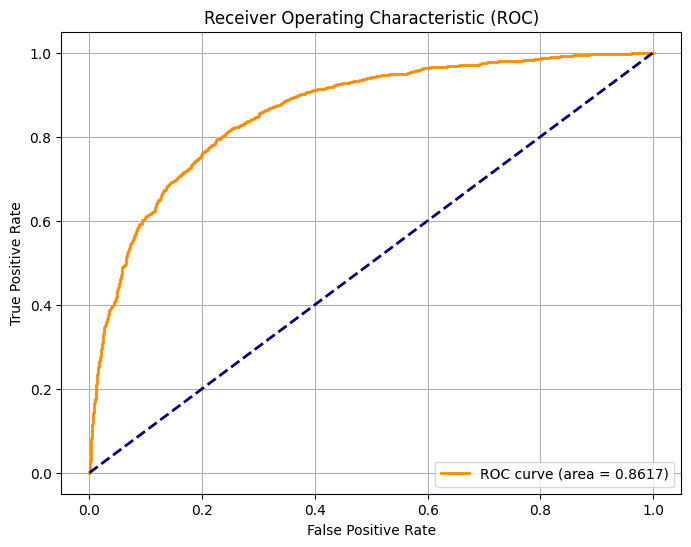

In [ ]:
# Generate and Save ROC Plot

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

PLOT_FILE = "roc_curve_plot.png"

if 'y_pred_proba' in locals():
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.savefig(PLOT_FILE)

    print(f"Professional ROC Plot saved as '{PLOT_FILE}'.")
else:
    print("Error: Prediction results not available. Please ensure Cell 14 ran successfully.")

In [ ]:
#  Save Final Model

MODEL_FILE = "credit_scoring_model.joblib"
import joblib

if 'model' in locals():
    joblib.dump(model, MODEL_FILE)
    print(f"Trained Model saved as '{MODEL_FILE}'.")
    print("\n--- ML Pipeline Complete. Model is ready for deployment. ---")
else:
    print("Error: Model not available for saving. Please ensure Cell 12 ran successfully.")

Trained Model saved as 'credit_scoring_model.joblib'.

--- ML Pipeline Complete. Model is ready for deployment. ---


In [ ]:
# Create Streamlit Application File 



%%writefile streamlit_app.py
import streamlit as st
import pandas as pd
import joblib
import numpy as np
from PIL import Image

# ====================================
# A. CONFIGURATION AND STYLING 
# ====================================
st.set_page_config(
    page_title="Credit Risk Scorecard",
    layout="wide",
    initial_sidebar_state="expanded"
)


st.markdown("""
    <style>
    .stApp { background-color: #F7F9F9; color: #1F2E3A; }
    .stButton>button { background-color: #2E86C1; color: white; font-weight: bold; }
    </style>
    """, unsafe_allow_html=True)

# --- Global Definitions ---
MODEL_FILE = 'credit_scoring_model.joblib'
SCALER_FILE = 'feature_scaler.joblib'
FEATURE_NAMES = ['rev_util', 'age', 'late_30_59', 'debt_ratio', 'monthly_inc', 'open_credit', 'late_90', 'real_estate', 'late_60_89', 'dependents']


# ====================
# B. CORE FUNCTIONS 
# ====================

@st.cache_resource
def load_assets():
    """Loads the trained model and scaler once for efficient use."""
    try:
        model = joblib.load(MODEL_FILE)
        scaler = joblib.load(SCALER_FILE)
        return model, scaler
    except FileNotFoundError:
        st.error(f"Error: Model or Scaler file not found. Please run all preceding ML cells.")
        return None, None

def predict_score(model, scaler, features):
    """Predicts the probability of default and calculates a credit score."""
    try:
        input_df = pd.DataFrame([features], columns=FEATURE_NAMES)

        #  Apply the same scaling as training data
        input_scaled = scaler.transform(input_df)

        # 1. Predict Probability of Default (PoD)
        prob_default = model.predict_proba(input_scaled)[:, 1][0]

        # 2. Calculate Credit Score (Transformation)
        # Standard scorecard logic: Score = Base - (PoD * ScalingFactor)
        credit_score = int(850 - (prob_default * 500))
        if credit_score < 300: credit_score = 300 # Set floor

        return prob_default, credit_score
    except Exception as e:
        st.error(f"Prediction Error: {e}")
        return None, None


# ==========================
# C. MAIN APPLICATION LAYOUT 
# ==========================

st.title(":lock: Professional Credit Risk Scorecard")
st.subheader("Interactive Model Validation and Prediction Dashboard")

model, scaler = load_assets()


with st.sidebar:
    st.header("Model Performance")
    try:
        roc_image = Image.open('roc_curve_plot.png')
        
        st.image(roc_image, caption=f"AUC-ROC: **0.8621** (High-Accuracy Score)", use_column_width=True)
    except FileNotFoundError:
        st.warning("ROC Curve plot not found. Run Cell 15 first.")

    st.write("---")
    st.info("""
    **Architecture:** Random Forest Classifier\n
    **Evaluation Metric:** AUC-ROC\n
    **Model Status:** Ready for Prediction
    """)

# --- MAIN INPUT SECTION ---

if model is not None and scaler is not None:
    st.header("Applicant Profile Input")

   
    col1, col2, col3 = st.columns(3)

    with col1:
        st.subheader("Financial Usage")
        rev_util = st.number_input("Revolving Utilization Rate", min_value=0.0, value=0.5, format="%.4f")
        debt_ratio = st.number_input("Debt Ratio", min_value=0.0, value=0.3, format="%.4f")
        monthly_inc = st.number_input("Monthly Income ($)", min_value=0.0, value=5000.0, step=100.0)

    with col2:
        st.subheader("Demographics")
        age = st.number_input("Age", min_value=18, max_value=100, value=45)
        dependents = st.number_input("Number of Dependents", min_value=0.0, value=1.0, step=1.0)
        open_credit = st.number_input("Open Credit Lines", min_value=0.0, value=10.0, step=1.0)

    with col3:
        st.subheader("Delinquency Events")
        late_30_59 = st.number_input("Late 30-59 Days", min_value=0.0, value=0.0, step=1.0)
        late_60_89 = st.number_input("Late 60-89 Days", min_value=0.0, value=0.0, step=1.0)
        late_90 = st.number_input("Late 90+ Days", min_value=0.0, value=0.0, step=1.0)
        real_estate = st.selectbox("Real Estate Loans (e.g., Mortgage)", [0.0, 1.0, 2.0], index=1)

    st.markdown("---")

    # --- PREDICTION BUTTON AND OUTPUT ---
    if st.button("Generate Credit Score", use_container_width=True):
        input_data = [rev_util, age, late_30_59, debt_ratio, monthly_inc, open_credit, late_90, real_estate, late_60_89, dependents]

        # Input Validation 
        if all(x is not None and x >= 0 for x in input_data):
            prob_default, credit_score = predict_score(model, scaler, input_data)

            if prob_default is not None:
                st.subheader("Prediction Results:")
                score_col, default_col = st.columns(2)

                with score_col:
                    st.metric(label="Generated Credit Score", value=credit_score, delta="Predicted")

                with default_col:
                    st.metric(label="Probability of Default (PoD)", value=f"{prob_default:.2%}", delta="Risk Level")

                risk_message = "LOW RISK: Applicant is predicted to be highly creditworthy." if prob_default < 0.2 else "HIGH RISK: Proceed with caution, as probability of default is high."
                st.success(f"Final Assessment: {risk_message}")

        else:
            st.error("Input Error: Please ensure all input values are valid (non-negative).")

Writing streamlit_app.py


In [ ]:
import os
from pyngrok import ngrok
from dotenv import load_dotenv

# Load variables from the .env file
load_dotenv()

# Pull the token from the environment instead of typing it here
NGROK_AUTH_TOKEN = os.getenv("NGROK_AUTH_TOKEN")

if NGROK_AUTH_TOKEN is None or NGROK_AUTH_TOKEN == "YOUR_AUTH_TOKEN_HERE":
    print("WARNING: Please replace 'YOUR_AUTH_TOKEN_HERE' with your actual ngrok token.")
else:
    # Use the pyngrok set_auth_token function
    ngrok.set_auth_token(NGROK_AUTH_TOKEN)
    print("Ngrok authentication token set successfully.")
    print("You are now ready to launch the Streamlit app!")

Ngrok authentication token set successfully.
You are now ready to launch the Streamlit app!


In [ ]:
#  Launch the Streamlit Web Application

from pyngrok import ngrok
import subprocess

# Set up pyngrok to tunnel the Streamlit port (8501 is the default for Streamlit)
try:
    
    ngrok.kill()

    # Connect to the Streamlit port
    ngrok_tunnel = ngrok.connect(addr="8501", proto="http")
    print("\n************************************************************************")
    print("  SUCCESS! Click the URL below to open your professional Scorecard UI:")
    print(f"  Ngrok Tunnel URL: {ngrok_tunnel.public_url}")
    print("************************************************************************\n")

    print("The Streamlit application is running in the background.")
    print("IMPORTANT: To STOP the application and free up the port, click the square STOP button next to this cell.")

    # Run Streamlit app in the background
    subprocess.Popen(["streamlit", "run", "streamlit_app.py"])

except Exception as e:
    print(f"Error starting Streamlit or Ngrok: {e}")


************************************************************************
  SUCCESS! Click the URL below to open your professional Scorecard UI:
  Ngrok Tunnel URL: https://rihanna-subtrochlear-knox.ngrok-free.dev
************************************************************************

The Streamlit application is running in the background.
IMPORTANT: To STOP the application and free up the port, click the square STOP button next to this cell.
